<a href="https://colab.research.google.com/github/burugajoseph/-AI-Modelling-MUK-/blob/main/(Explained)Machine_Learning_Modelling_Rabies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Develop a machine learning model to predict the likelihood of death from rabies infection**

The objectives of the case study is to create a machine leanring model for prediction of deaths and bites using the rabies data set are to develop accurate and reliable machine learning models that can help public health officials and healthcare providers to identify and respond to cases of rabies infection in a timely and effective manner.

In below case study I will discuss the step by step approach to create a Machine Learning predictive model in such scenarios.

You can use this flow as a template to solve any supervised ML Regression problem!

The flow of the case study is as below:

1. Reading the data in python
2. Defining the problem statement
3. Identifying the Target variable
4. Looking at the distribution of Target variable
5. Basic Data exploration
6. Rejecting useless columns
7. Visual Exploratory Data Analysis for data distribution (Histogram and Barcharts)
8. Feature Selection based on data distribution
9. Outlier treatment
10. Missing Values treatment
11. Visual correlation analysis
12. Statistical correlation analysis (Feature Selection)
13. Converting data to numeric for ML
14. Sampling and K-fold cross validation
15. Trying multiple Regression algorithms
16. Selecting the best Model
17. Deploying the best model in production

## Reading the data into python
This is one of the most important steps in machine learning! You must understand the data and the domain well before trying to apply any machine learning algorithm.

The data has two files "general_info.csv" & "rabies_bite.csv". These file contains data collected for the past 20 years.

Download the datasets from the following link:
[Download Data](https://drive.google.com/drive/folders/1eX9uWAKZdyv-l046qCV53iscrHXbIuU5?usp=share_link)

**Data description**

The business meaning of each column in the data is as below

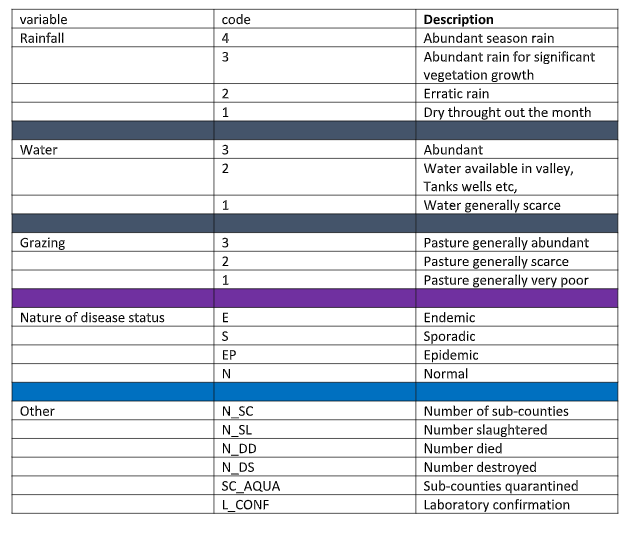

# New Section

In [ ]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
def RabiesBites():

  print(df)


In [ ]:
def general_info():
    print(df)

In [ ]:
# Rabies df
# Generalinfo
# rabies_bite Dataset

In [ ]:
# Reading the dataset

# General_info Dataset
Generalinfo = pd.read_csv("general_info.csv")

# rabies_bite Dataset
RabiesBites = pd.read_csv('rabies_bite.csv')


In [ ]:
# merge the two dataframes on columns 'Month' and 'District'
Rabies_df = pd.merge(RabiesBites, Generalinfo, on =['Month','District'], how = 'left')

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
Rabies_df.tail()

In [ ]:
# Encode the district column
# Define the maping of the District column

# District dictionary'

district_label = {
     'AMUDAT': 1,
    'BUGWERI': 2,
    'BULIISA': 3,
    'BULAMBULI': 4,
    'KOTIDO': 5,
    'IBANDA': 6,
    'IGANGA': 7,
    'KOBOKO': 8,
    'LUWERO': 9,
    'MBALE': 10,
    'MOROTO': 11,
    'MOYO': 12,
    'MUKONO': 13,
    'RAKAI': 14,
    'TORORO': 15,
    'NABILATUK': 16,
    'KYENJOJO': 17,
    'RUKUNGIRI': 18,
    'YUMBE': 19,
    'NAMUTUMBA': 21,
    'BUSIA': 22,
    'ABIM': 24,
    'KUMI': 25,
    'LUUKA': 26,
    'ARUA': 27,
    'KABERAMAIDO': 28,
    'KIBOGA': 29,
    'NAKAPIRIPIRITI': 30,  # Corrected label for 'NAKAPIRIPIRITI'
    'SEMBABULE': 31,
    'KAMULI': 32,
    'KIBAALE': 33,
    'LIRA': 34,
    'KAPCHORWA': 35,
    'MPIGI': 36,
    'KASESE': 37,
    'KITGUM': 38,
    'BUGIRI': 39,
    'JINJA': 40,
    'HOIMA': 41,
    'KANUNGU': 42,
    'BUSHENYI': 43,
    'MBARARA': 44,
    'NEBBI': 45,
    'KAYUNGA': 46,
    'KAMPALA': 47,
    'PADER': 48,
    'MUBENDE': 49,
    'MASINDI': 50,
    'RABIES': 51,
    'SOROTI': 52,
    'ADJUMANI': 53,
    'WAKISO': 54,
    'KABAROLE': 55,
    'BUNDIBUGYO': 56,
    'GULU': 57,
    'KALANGALA': 58,
    'NTUNGAMO': 59,
    'KATAKWI': 60,
    'MAYUGE': 61,
    'KAMWENGE': 62,
    'SIRONKO': 63,
    'KABALE': 64,
    'NAKASONGOLA': 65,
    'PALLISA': 66,
    'MASAKA': 67,
    'APAC': 68,
    'KISORO': 69


}

#Replace the values in 'District' using the dictionary
Rabies_df['District'].replace(district_label, inplace = True)

Rabies_df.tail()

In [ ]:
# Reading the dataset

# General_info Dataset
Generalinfo = pd.read_csv('general_info.csv')

# rabies_bite Dataset
RabiesBites = pd.read_csv('rabies_bite.csv')

In [ ]:
from pandas.core import describe
import pandas as pd
path = "/content/drive/MyDrive/rabies_bite.csv"
df = pd.read_csv(path)
df.describe

<bound method NDFrame.describe of       District      Month  Suspected cases in animals  \
0       MOROTO  31-Jan-96                           6   
1       KOTIDO  31-Jan-96                           0   
2     KABAROLE  31-Jan-96                           0   
3        NEBBI  31-Jan-96                           2   
4       KIBOGA  31-Jan-96                           0   
...        ...        ...                         ...   
1224  NTUNGAMO  31-Dec-02                           4   
1225   MUBENDE  31-Dec-02                           0   
1226   MASINDI  31-Dec-02                           1   
1227    WAKISO  31-Dec-02                           8   
1228    BUGIRI  31-Dec-02                           1   

      Suspected bites by animals  Deaths  Emergency vaccinations  Dogs  Cats  \
0                             16       0                      16    20     2   
1                              0       0                       0   318     3   
2                              0       0 

In [ ]:
from pandas.core import describe
import pandas as pd
path = "/content/drive/MyDrive/general_info.csv"
df = pd.read_csv(path)
df.describe

<bound method NDFrame.describe of         District      Month  Rainfall  Water  Grazing
0           APAC  31-Jan-96         3      2        2
1           ARUA  31-Jan-96         1      3        2
2     BUNDIBUGYO  31-Jan-96         1      2        2
3       BUSHENYI  31-Jan-96         3      3        3
4           GULU  31-Jan-96         3      3        3
...          ...        ...       ...    ...      ...
1690   SEMBABULE  31-Dec-02         2      2        3
1691      SOROTI  31-Dec-02         3      3        2
1692      TORORO  31-Dec-02         4      3        3
1693      WAKISO  31-Dec-02         3      2        3
1694       YUMBE  31-Dec-02         1      2        1

[1695 rows x 5 columns]>

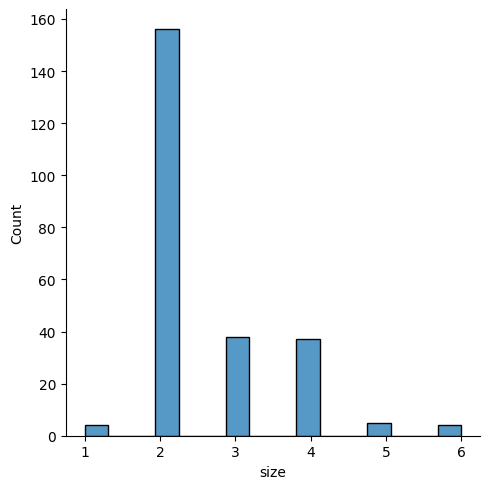

In [ ]:
# import seaborn
import seaborn as sns
tips = sns.load_dataset("tips")
sns.displot(tips, x="size")

In [ ]:
data = {
    data = {
    "rabiesbites" : [],
    "generalinfo" : []
}
df = pd.DataFrame(data, index=["generalinfo"])
}
df = pd.DataFrame(data, index=["rabiesbites"])

SyntaxError: ignored

In [ ]:
# merge the two dataframes on columns 'Month' and 'District'

rabies_df = pd.merge('rabiesbites' , 'generalinfo' , on = ['Month','District'], how = 'left')

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
rabies_df.tail()
df.describe

**Exploratory Data Analysis**

Looking at the distribution of Target variables If target variable's distribution is too skewed then the predictive modeling will not be possible. Bell curve is desirable but slightly positive skew or negative skew is also fine When performing Regression, make sure the histogram looks like a bell curve or slight skewed version of it. Otherwise it impacts the Machine Learning algorithms ability to learn all the scenarios.

In [ ]:
# Plotting the histogram using seaborn
sns.histplot(data=rabies_df, x='Deaths')

# Adding labels and title
plt.xlabel('Number of Deaths')
plt.ylabel('Fequency')

# Display the Histogram plot
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# New Section

If the target variable's histogram doesn't look like a bell curve or is slightly skewed, there are several things you can do to handle this issue:

Log transformation: If the data is right-skewed, you can try applying a log transformation to make the distribution more symmetrical. This can help to reduce the impact of extreme values and make the distribution more bell-shaped.

Box-Cox transformation: The Box-Cox transformation is a widely used technique that can transform non-normal data into approximately normal data. It involves applying a power transformation to the data, where the optimal value of the power is selected based on the data itself.

Outlier removal: If the distribution is skewed due to the presence of outliers, you can try removing them to see if it improves the distribution.

Bin or bucket the data: Binning or bucketing involves dividing the data into a set of discrete intervals or categories, which can help to reduce the impact of small variations in the data and make the distribution more uniform.

Try different models: Some machine learning models are more robust to non-normal distributions than others. For example, tree-based models like Random Forest and XGBoost are generally less sensitive to non-normality than linear models like Linear Regression or Logistic Regression.

**Basic Data Exploration**

This step is performed to guage the overall data. The volume of data, the types of columns present in the data. Initial assessment of the data should be done to identify which columns are Quantitative, Categorical or Qualitative.

This step helps to start the column rejection process. You must look at each column carefully and ask, does this column affect the values of the Target variable? For example in this case study, you will ask, does this column affect the Strength of the concrete? If the answer is a clear "No", then remove the column immediately from the data, otherwise keep the column for further analysis.

There are four commands which are used for Basic data exploration in Python

**head()** : This helps to see a few sample rows of the data

**info()** : This provides the summarized information of the data

**describe()** : This provides the descriptive statistical details of the data

**nunique()**: This helps us to identify if a column is categorical or continuous

In [ ]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning

Rabies_df.info()

In [ ]:
# Looking at the descriptive statistics of the data
Rabies_df.describe(include='all')

**Types od Data**

**Continuous Data:**

Continuous data represents measurements or observations that can take any value within a specific range or interval. It is usually represented by real numbers.

Continuous data is infinitely divisible, meaning that it can be divided into smaller and smaller increments. It can take on any value within a range, including decimal numbers.
Examples: Examples of continuous data include age, height, weight, temperature, and income. These variables can take on a wide range of values and can be measured with precision.

Categorical Data:

Categorical data represents variables that have distinct categories or labels. Each observation falls into one of the pre-defined categories.

Categorical data is typically represented by strings, integers, or other discrete values. The values have no inherent numerical meaning or order.

Examples: Examples of categorical data include gender (e.g., male or female), marital status (e.g., married, single, divorced), colors (e.g., red, blue, green), and educational levels (e.g., high school, bachelor's, master's, Ph.D.).

**Basic Data Exploration Results**

Based on the basic exploration above, you can now create a simple report of the data, noting down your observations regaring each column. Hence, creating a initial roadmap for further analysis.

The selected columns in this step are not final, further study will be done and then a final list will be created


Emergency vaccinations: Continuous. Selected.

Dogs: Continuous. Selected.

Cats: Continuous. Selected.

Pets destroyed: Continuous. Selected.

Rainfall: Categorical. Selected.

Water: Categorical. Selected.

Grazing: Categorical. Selected.

Suspected bites by animals: Continuous. Selected.

Deaths: This is the Target Variable!

In [ ]:
# Removing duplicate rows if any
Rabies_df = Rabies_df.drop_duplicates()

**Outlier treatment**

Outliers are extreme values in the data which are far away from most of the values. You can see them as the tails in the histogram.

Outlier must be treated one column at a time. As the treatment will be slightly different for each column.

**Why I should treat the outliers?**

Outliers bias the training of machine learning models. As the algorithm tries to fit the extreme value, it goes away from majority of the data.

There are below two options to treat outliers in the data.

Option-1: Delete the outlier Records. Only if there are just few rows lost.

Option-2: Impute the outlier values with a logical business value

**Missing values treatment**

Missing values are treated for each column separately.

If a column has more than 30% data missing, then missing value treatment cannot be done. That column must be rejected because too much information is missing.

There are below options for treating missing values in data.

Delete the missing value rows if there are only few records Impute the missing values with MEDIAN value for continuous variables Impute the missing values with MODE value for categorical variables Interpolate the values based on nearby values Interpolate the values based on business logic

In [ ]:
# Finding how many missing values are there for each column
Rabies_df.isnull().sum()

In [ ]:
# replace missing values with mode
Rabies_df['Rainfall'] = Rabies_df['Rainfall'].fillna(Rabies_df['Rainfall'].mode()[0])
Rabies_df['Water'] = Rabies_df['Water'].fillna(Rabies_df['Water'].mode()[0])
Rabies_df['Grazing'] = Rabies_df['Grazing'].fillna(Rabies_df['Grazing'].mode()[0])

In [ ]:
# Checking how many missing values are there for each column again
Rabies_df.isnull().sum()

In [ ]:
# Droping 'District' and 'Month' columns
Rabies_df = Rabies_df.drop('District', axis=1)
Rabies_df = Rabies_df.drop('Month', axis=1)


**Feature Engineering**

In [ ]:
# Convert any columns with string values to numeric values

# Rabies_df['District'] = pd.to_numeric(Rabies_df['District'], errors='coerce')
# Rabies_df['Month'] = pd.to_numeric(Rabies_df['Month'], errors='coerce')


# Calculate the correlation matrix

selected_columns = ['Suspected cases in animals','Suspected bites by animals','Deaths','Emergency vaccinations','Dogs','Cats','Pets destroyed']
corr_matrix  = Rabies_df[selected_columns].corr()

# Visualize the correlation matrix using a heatmap
sns.heatmap(corr_matrix, annot=True, cmap = 'coolwarm')


**Interpreting the Correlation Matrix**

Interpreting a correlation matrix in machine learning involves understanding the relationships between variables and identifying patterns and dependencies. Here are some key points to consider when interpreting a correlation matrix:

1. Range of correlation coefficients: Correlation coefficients range from -1 to +1. A value of -1 indicates a perfect negative correlation, +1 indicates a perfect positive correlation, and 0 indicates no correlation between the variables. Values closer to -1 or +1 suggest stronger relationships, while values closer to 0 suggest weaker or no relationships.

2. Direction of the correlation: The sign of the correlation coefficient indicates the direction of the relationship. A positive correlation coefficient indicates that as one variable increases, the other variable tends to increase as well. A negative correlation coefficient indicates that as one variable increases, the other variable tends to decrease.

3. Strength of the correlation: The magnitude of the correlation coefficient indicates the strength of the relationship. Larger absolute values (closer to 1) suggest a stronger correlation, while values closer to 0 indicate a weaker correlation. However, the interpretation of what constitutes a "strong" or "weak" correlation can vary depending on the context and domain knowledge.

**Splitting Dataset in to Training Set & Test Set**

In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X = Rabies_df.drop("Deaths", axis=1)
y = Rabies_df["Deaths"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure that X_train and y_train have the same indices
y_train = y_train.loc[X_train.index]



**Encoding Features**

Encoding features in machine learning is a common preprocessing step that involves converting categorical or ordinal features into a numerical representation that machine learning algorithms can understand. Here are some reasons why feature encoding is important in machine learning:

1. Numerical representation: Most machine learning algorithms work with numerical data. By encoding categorical or ordinal features into numerical values, you enable the algorithms to process and learn from those features.

2. Handling categorical variables: Categorical variables, such as colors or product categories, cannot be directly used as inputs for many machine learning models. Encoding categorical variables allows you to represent them as numerical values, enabling the algorithms to work with these variables.

3. Preserving ordinal information: In some cases, you may have ordinal features, where the categories have a specific order or ranking. By encoding ordinal variables, you preserve the ordinal information in a way that the model can understand. For example, low, medium, and high can be encoded as 0, 1, and 2.

4. Avoiding arbitrary numerical assignments: When encoding categorical variables, it's essential to use a consistent and meaningful representation. If you were to assign arbitrary numerical values to categories, the model might mistakenly interpret the encoded values as having an inherent order or relationship, leading to incorrect results. Encoding ensures that the numerical representation captures the relevant information without introducing unintended biases.

Common methods for encoding categorical and ordinal features include:

1. One-Hot Encoding: This method creates binary columns for each category, where a value of 1 indicates the presence of that category and 0 represents its absence. One-hot encoding is suitable for nominal (unordered) categorical variables.

2. Label Encoding: This method assigns a unique numerical label to each category. Label encoding is suitable for ordinal variables where the order matters. However, caution should be exercised as some algorithms may interpret the encoded labels as having a meaningful magnitude. **(Choosen)**

3. Ordinal Encoding: This method assigns numerical values to ordinal categories according to their order. Ordinal encoding preserves the ordinal relationship between categories.

In [ ]:
# Encode categorical features using Label Encoding

from sklearn.preprocessing import LabelEncoder

categorical_cols = ["Rainfall", "Water", "Grazing"]

encoder = LabelEncoder()

for col in categorical_cols:
    X_train[col] = encoder.fit_transform(X_train[col])
    X_test[col] = encoder.transform(X_test[col])

'''
In this code, we iterate over each categorical column and apply label encoding using the fit_transform method
on the training data and transform method on the test data.
The original categorical columns are replaced with their encoded values.
'''


'\nIn this code, we iterate over each categorical column and apply label encoding using the fit_transform method \non the training data and transform method on the test data.\nThe original categorical columns are replaced with their encoded values.\n'

In [ ]:
# ecoding with ordinalEcoder


**Scaling Features**

Scaling features in machine learning is an important preprocessing step that helps bring different features onto a similar scale. It is particularly useful when using algorithms that are sensitive to the scale of the input features. Here are a few reasons why feature scaling is commonly performed in machine learning:

1. Avoiding dominance of certain features: If the features have different scales, those with larger magnitudes can dominate the learning process. By scaling the features, you ensure that each feature contributes proportionally to the learning process.

2. Assisting gradient-based optimization: Many optimization algorithms used in machine learning, such as gradient descent, converge faster when features are scaled. Scaling can improve the efficiency and speed of training.

3. Enhancing performance of distance-based algorithms: Distance-based algorithms, such as k-nearest neighbors (KNN) and support vector machines (SVM), rely on calculating distances between data points. If features are not scaled, those with larger scales may disproportionately influence the distance calculations, leading to biased results.

4. Preparing for regularization: Regularization techniques, like L1 and L2 regularization, penalize larger weights. When features have different scales, the regularization term may disproportionately penalize certain features. Scaling features can help ensure a fair regularization across all features.

**Common methods for scaling features include:**

1. Standardization (Z-score normalization): This scales features to have a mean of zero and a standard deviation of one. It preserves the shape of the distribution and is suitable for most cases.(**Choosen for this case**)

2. Min-Max scaling: This scales features to a specific range, typically between 0 and 1. It is useful when you need to preserve the original minimum and maximum values.

3. Robust scaling: This method scales features based on the interquartile range, making it robust to outliers. It preserves the median and the range between the first and third quartiles.

4. Normalization: This scales features to have a specific norm, such as unit norm. It can be useful when you need to compare samples based on their vector magnitudes.

In [ ]:
# Scaling the features
from sklearn.preprocessing import StandardScaler

continuous_cols = ["Suspected cases in animals", "Suspected bites by animals", "Emergency vaccinations", "Dogs", "Cats", "Pets destroyed"]

scaler = StandardScaler()
X_train[continuous_cols] = scaler.fit_transform(X_train[continuous_cols])
X_test[continuous_cols] = scaler.transform(X_test[continuous_cols])


# Drop the Null values if any
X_train.dropna(inplace=True)
X_test.dropna(inplace=True)
y_train = y_train[X_train.index]


# Print the shapes of the datasets
print("Shape of X_train:", np.shape(X_train))
print("Shape of y_train:", np.shape(y_train))
print("Shape of X_test:", np.shape(X_test))
print("Shape of y_test:", np.shape(y_test))


**Linear Reggression Model**

In [ ]:
from sklearn import linear_model
# Train and evaluate a model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# creating an instancebof the algoithe
#linear_model = regression()
# Linear_model.fit(X_train, y_train)

# Mean Squared Error



Results:

**Regularization**

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
# Create a Lasso model with alpha = 0.5


# Train the Lasso model on the training data

# Lasso_reg.Fit(x_train, y_train)
# Evaluate the Lasso model on the test data
Y_pred_lasso = Lasso_Predict(X_train)

# Create a Ridge model with alpha = 0.5
Ridge_reg = redge(alpha = 0.5)

# Train the Ridge model on the training data
Ridge_reg.fit(X_train, y_train)

# Evaluate the Ridge model on the test data
y_pred_ridge = ridge_reg.pridict(X_test)
# getting the mean squared error
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print("ridge_regression mean square error :", mse_ridge)
print("Lasso_regression mean square error :", mse_lasso )

**Lasso Regression Model:** The Lasso Regression model achieved an MSE of 0.323 on the test data. This indicates that, on average, the model's predictions have a squared difference of 0.308 with the corresponding actual values in the test set. Lower MSE values suggest better predictive accuracy, so the Lasso Regression model performs relatively well in terms of minimizing the squared differences between predicted and actual values.

**Ridge Regression Model:** The Ridge Regression model achieved an MSE of 0.397 on the training data. This indicates that, on average, the model's predictions have a squared difference of 0.363 with the corresponding actual values in the training set. The higher MSE value compared to the Lasso Regression model suggests that the Ridge Regression model may have slightly lower predictive accuracy on the training data.

**Logistic Regression Model**

In [ ]:
from tensorflow.python import train
from ipywidgets.widgets.widget_int import Instance
# Train and evaluate a Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# create an Instance
logistic_model = LogisticRegression

# Making Table report
from tabulate import tabulate

# fit the model
logistic_model.fit(X_train, y_train)

# Evaluation of our model
y_train_log = logistic_model.predict(X_train)
y_train_log = logistic_model.predict(X_test)

# making the table
from tabulate import tabulate

# Generate classification reports
train_report = classification_report(y_train, y_pred_train_log)
test_report = classification_report(y_test, y_pred_test_log)

# Format reports as tables
train_report = tabulate([['train report'],[train report]], headers= "firstrow", Tablefmt= "fancy_grid")
train_report = tabulate([['test report'],[test report]], headers= "firstrow", Tablefmt= "fancy_grid")
# Print the tables
print(train_report)
print(test_report)


**Results**



**Decision Trees**

In [ ]:
import tables
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from tabulate import tabulate

# create an instance
decision_model = DecisionTreeClassifier()

# Model Fitting
decision_model.fit('X_train', 'y_train')

# Evaluation of our model
y_pred_train_dec = decision_model.predict(X_train)
y_pred_train_dec = decision_model.predict(X_test)

# generate classification reports
train_report = classification_report(y_train, y_pred_train_dec)
train_report = classification_report(y_test, 'y_pred_test_dec')

# formate report as tables
train_report = tabulate([['train report'],['train_report_dec']], headers= "firstrow", tablefmt="fancy_grid")
test_report = tabulate([['test report'],['test_report_dec']], headers= "firstrow", tablefmt="fancy_grid")

# Print the tables
print(train_report)
print(test_report)



ValueError: ignored

**Results**



**Artifical Neural Network Model**

In [ ]:
# Train and evaluate a model
import keras
from keras.models import Sequential
from keras.layers import Dense , Dropout
from keras import regularizers

# creating an Instance

ANN_model = Sequential()
ANN_model.add(Dense(10, input_dim = 10, Activation="relu"))

# define the model

# Regulization
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(64, Activation="relu", kernel_regularizer=.12(0.01)))
ANN_model.add(dropout(0.5))
# Activation
ANN_model.add(Dense(1, activation="linear"))

# compile the model
ANN_model.compile(loss= "mean_squared_error", optimizer='adim')

# Fit the model
ANN_model.fit(x_train, y_train, epochs = 100, batch_size = 32)

# evaluate the model
train_mse_ANN = ANN_model.evaluate(x_train, y_train)
test_mse_ANN = ANN_model.evaluate(X_test, y_test)

print("Trianing MSE: ", train_mse_ANN)
prin("Testing MSE: " , test_mse_ANN)

In [ ]:
from sklearn.metrics import r2_score
# Evaluation of our model
y_pred_train_ANN = ANN_model.predict(X_train)
y_pred_train_ANN = ANN_model.predict(X_test)

# Calculate R-squared for training data
r2_train = r2_score(y_train, y_pred_train_ANN)

# Calculate R-squared for test data
r2_test = r2_score(y_test, 'y_pred_test_ANN')

# Printingthe results:
print("R-squared (Train): ", r2_train )
print("R-squared (Test): ", r2_test)

NameError: ignored

# New Section

**Random Forest and Gradient Boosting methods**

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# create an Instace
rf_model = RandomForestClassifier()

# fit the model
rf_model.fit(x_train,y_train)

# Train Random Forest model


# Make predictions using Random Forest model
rf_predictions = rf_model.pridict(x_train)

# Calculate accuracy metrics for Random Forest model
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_confusion_matrix = confusion_matrix(y_test, rf_predictions)

# Train Gradient Boosting model


# Make predictions using Gradient Boosting model
rf_predictions = rf-Model.pridict(X_test)

#Generate the report
rf_classification_report = classification_report(y_test, rf_predictions)


# Print the accuracy metrics
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest confusion Matrix", rf_confusion_matrix)

print("classification report")
print(rf_classification_report)



NameError: ignored